In [1]:
import gzip
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox

# Path to your file
file_path = "../bay_area_network.pkl.gz"

# Load the graph
with gzip.open(file_path, "rb") as f:
    G = pickle.load(f)

# Get the graph from the network key
graph = G["network"]

# Print basic network statistics
print("Network Statistics:")
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")




Network Statistics:
Number of nodes: 50575
Number of edges: 129395


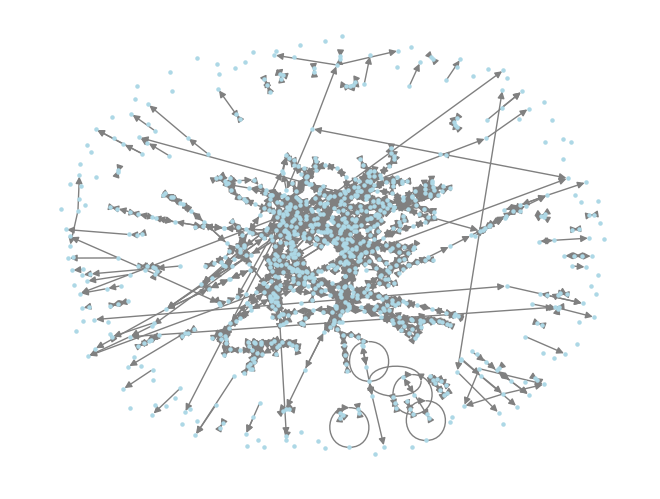

In [13]:
# For very large graphs, plot a small subgraph for clarity
sub_nodes = list(graph.nodes)[:1000]  # first 500 nodes
subgraph = graph.subgraph(sub_nodes)
nx.draw(subgraph, node_size=5, node_color='lightblue', edge_color='gray', with_labels=False)
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'graph' is your NetworkX graph
nx.draw(graph, node_size=10, node_color='lightblue', edge_color='gray', with_labels=False)
plt.show()

In [ ]:
from pyvis.network import Network
import networkx as nx

# graph = your NetworkX graph
net = Network(height="800px", width="100%", notebook=True, cdn_resources='in_line')


# Add nodes and edges
for node, deg in graph.degree():
    net.add_node(node, size=deg)  # node size proportional to degree

for u, v in graph.edges():
    net.add_edge(u, v)

# Show interactive visualization in browser
net.show("network.html")

test


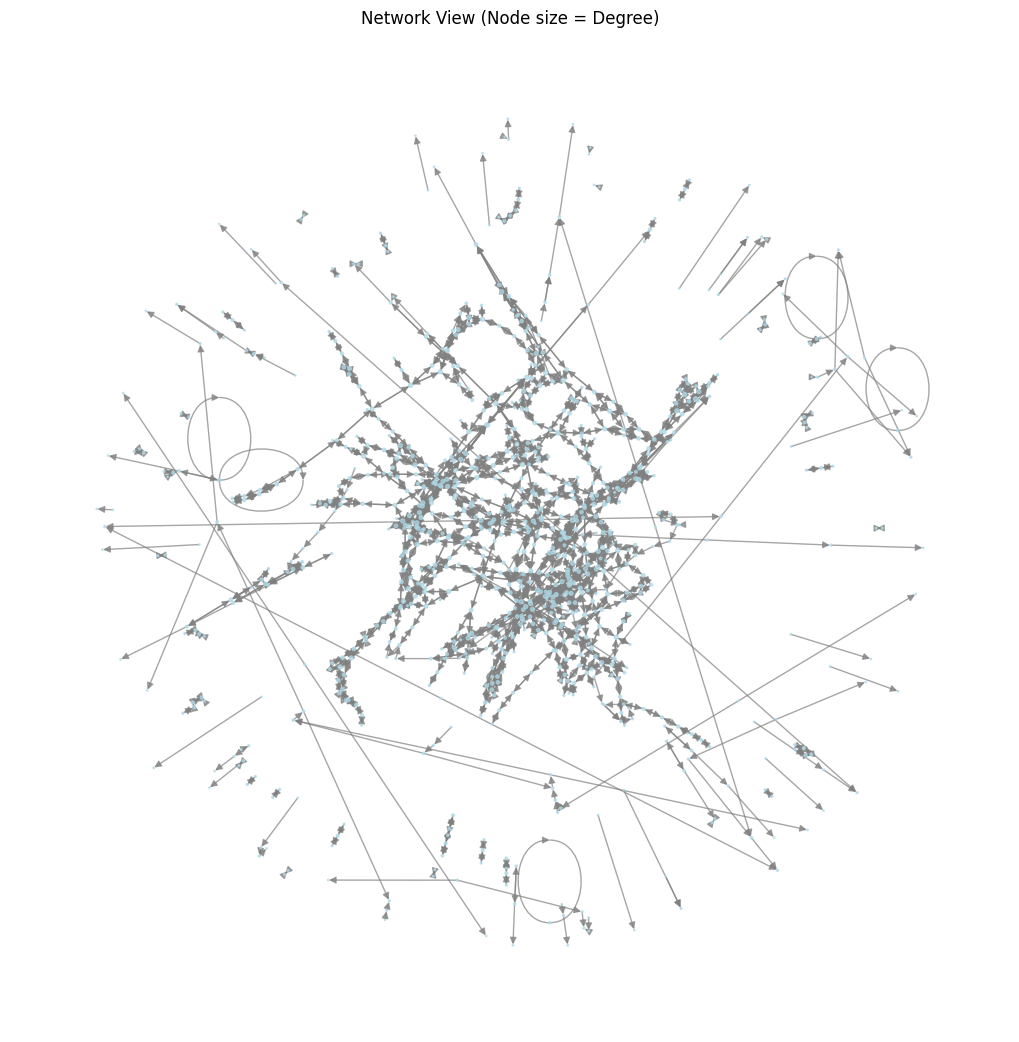

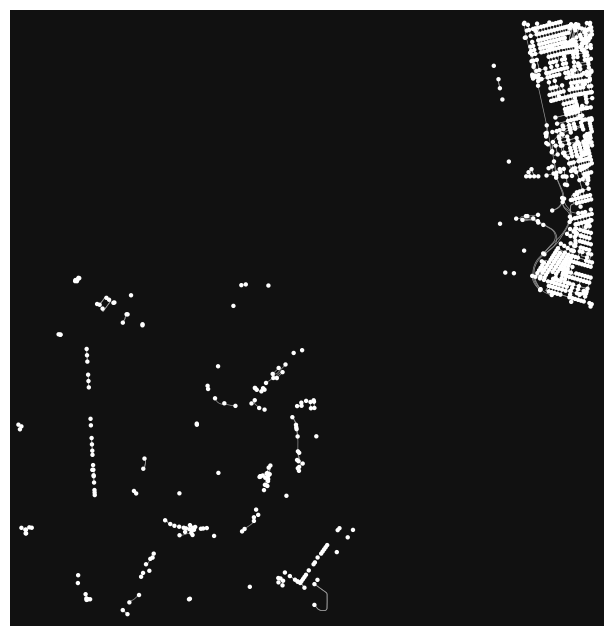

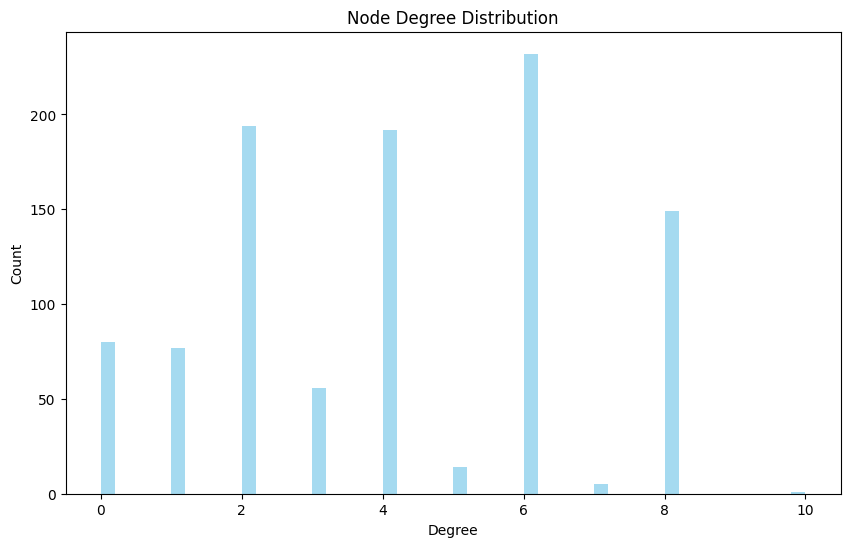

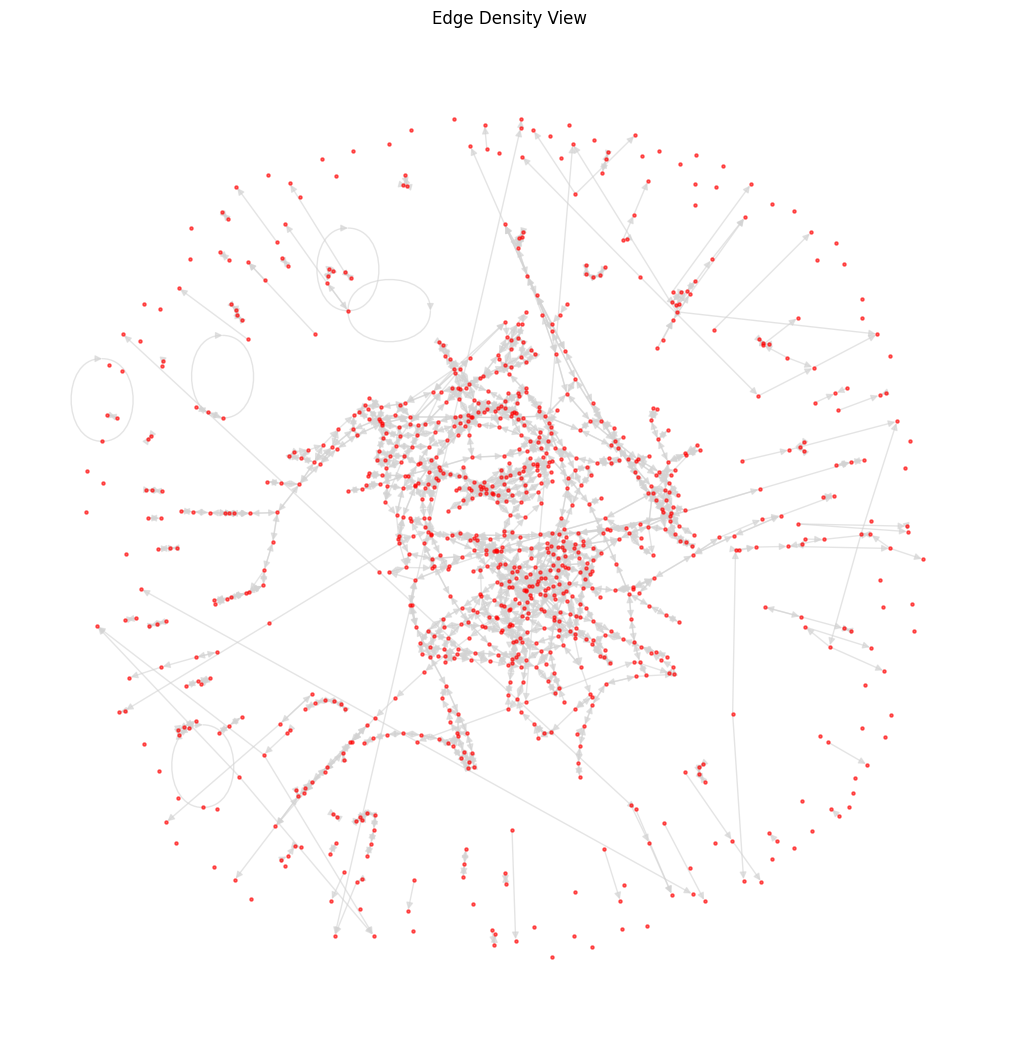


Additional Network Metrics:
Average node degree: 4.10
Network density: 0.002052
Note: Graph might not be fully connected for shortest path calculation


In [12]:
# Calculate node degrees (how many connections each node has)
node_degrees = dict(subgraph.degree())
print("test")

# 1. Basic network visualization with node sizes based on degree
plt.figure(figsize=(10, 10))
nx.draw(subgraph, node_size=[v for v in node_degrees.values()], node_color='lightblue', edge_color='gray', alpha=0.7, with_labels=False)
plt.title("Network View (Node size = Degree)")
plt.show()

# 2. OSMnx detailed plot
ox.plot_graph(subgraph, node_size=10, edge_linewidth=0.5)


# 3. Degree distribution
degrees = [d for n, d in subgraph.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, alpha=0.75, color='skyblue')
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# 4. Edge density visualization
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))
nx.draw(subgraph, pos, node_size=5, node_color='red', edge_color='lightgray', alpha=0.6, with_labels=False)
plt.title("Edge Density View")
plt.show()

# Print additional network metrics
print("\nAdditional Network Metrics:")
print(f"Average node degree: {sum(degrees) / len(degrees):.2f}")
print(f"Network density: {nx.density(subgraph):.6f}")
try:
    print(f"Average shortest path length: {nx.average_shortest_path_length(subgraph):.2f}")
except:
    print("Note: Graph might not be fully connected for shortest path calculation")